In [1]:
import torch
import torch.optim as optim

# Given data
t_c = torch.tensor([0.5, 14.0, 15.0, 28.0, 11.0, 8.0, 3.0, -4.0, 6.0, 13.0, 21.0], dtype=torch.float32)
t_u = torch.tensor([35.7, 55.9, 58.2, 81.9, 56.3, 48.9, 33.9, 21.8, 48.4, 60.4, 68.4], dtype=torch.float32)

# Normalize input data
t_u_normalized = (t_u - t_u.mean()) / t_u.std()

# Initialize weights and bias
w1 = torch.randn(1, requires_grad=True)
w2 = torch.randn(1, requires_grad=True)
b = torch.randn(1, requires_grad=True)

# Define the nonlinear model
def nonlinear_model(t_u):
    return w2 * t_u ** 2 + w1 * t_u + b

# Define the loss function
def loss_fn(y_pred, y_true):
    return ((y_pred - y_true) ** 2).mean()

# Training function for Problem 1a
def train_model(learning_rate, n_epochs=5000):
    optimizer = optim.SGD([w1, w2, b], lr=learning_rate)
    losses = []

    for epoch in range(1, n_epochs + 1):
        y_pred = nonlinear_model(t_u_normalized)
        loss = loss_fn(y_pred, t_c)

        # Backward pass and parameter update
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()

        # Record loss every 500 epochs
        if epoch % 500 == 0:
            losses.append((epoch, loss.item()))
            print(f'Epoch {epoch}: Loss = {loss.item()}')

    return losses



In [2]:
# Test four different learning rates
learning_rates = [0.1, 0.01, 0.001, 0.0001]
results = {}

for lr in learning_rates:
    # Re-initialize parameters for each run
    w1 = torch.randn(1, requires_grad=True)
    w2 = torch.randn(1, requires_grad=True)
    b = torch.randn(1, requires_grad=True)

    print(f"\nTraining with Learning Rate: {lr}")
    losses = train_model(learning_rate=lr)
    results[lr] = losses



Training with Learning Rate: 0.1
Epoch 500: Loss = 2.090719699859619
Epoch 1000: Loss = 2.090719699859619
Epoch 1500: Loss = 2.090719699859619
Epoch 2000: Loss = 2.090719699859619
Epoch 2500: Loss = 2.090719699859619
Epoch 3000: Loss = 2.090719699859619
Epoch 3500: Loss = 2.090719699859619
Epoch 4000: Loss = 2.090719699859619
Epoch 4500: Loss = 2.090719699859619
Epoch 5000: Loss = 2.090719699859619

Training with Learning Rate: 0.01
Epoch 500: Loss = 2.0924723148345947
Epoch 1000: Loss = 2.0907211303710938
Epoch 1500: Loss = 2.09071946144104
Epoch 2000: Loss = 2.09071946144104
Epoch 2500: Loss = 2.09071946144104
Epoch 3000: Loss = 2.09071946144104
Epoch 3500: Loss = 2.09071946144104
Epoch 4000: Loss = 2.09071946144104
Epoch 4500: Loss = 2.09071946144104
Epoch 5000: Loss = 2.09071946144104

Training with Learning Rate: 0.001
Epoch 500: Loss = 27.762975692749023
Epoch 1000: Loss = 8.668367385864258
Epoch 1500: Loss = 4.097599029541016
Epoch 2000: Loss = 2.7676010131835938
Epoch 2500: Lo

Epoch 500: Loss = 2.0912728309631348
Epoch 1000: Loss = 2.0907199382781982
Epoch 1500: Loss = 2.09071946144104
Epoch 2000: Loss = 2.09071946144104
Epoch 2500: Loss = 2.09071946144104
Epoch 3000: Loss = 2.09071946144104
Epoch 3500: Loss = 2.09071946144104
Epoch 4000: Loss = 2.09071946144104
Epoch 4500: Loss = 2.09071946144104
Epoch 5000: Loss = 2.09071946144104


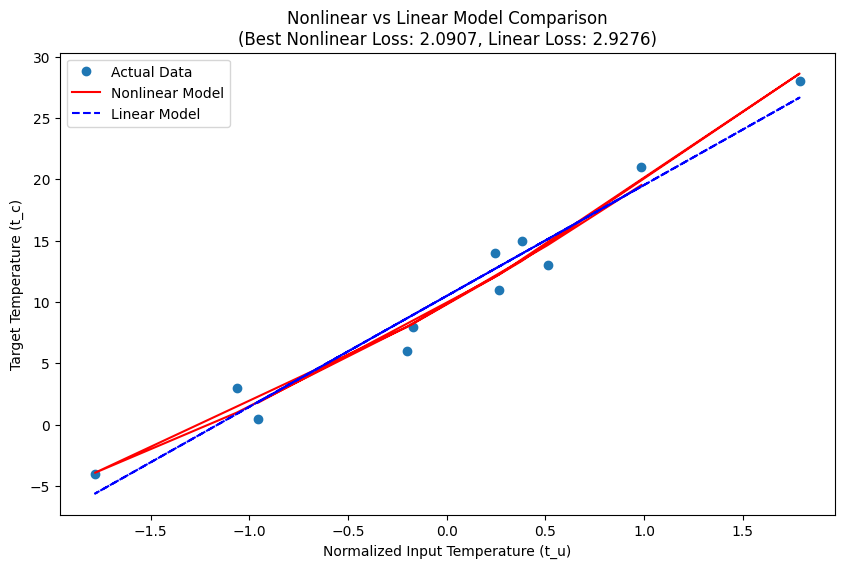

The nonlinear model performs better than the linear model.


In [3]:
import matplotlib.pyplot as plt

# Define the linear model
def linear_model(t_u):
    w_linear = torch.randn(1, requires_grad=True)
    b_linear = torch.randn(1, requires_grad=True)
    optimizer_linear = optim.SGD([w_linear, b_linear], lr=0.01)

    for epoch in range(5000):
        y_pred_linear = w_linear * t_u + b_linear
        loss_linear = loss_fn(y_pred_linear, t_c)

        loss_linear.backward()
        optimizer_linear.step()
        optimizer_linear.zero_grad()

    return y_pred_linear.detach(), loss_linear.item()

# Get predictions for best nonlinear model
best_lr = min(results, key=lambda x: results[x][-1][1])  # Pick the best learning rate based on final loss
train_model(best_lr)  # Retrain the best model for final predictions
best_nonlinear_predictions = nonlinear_model(t_u_normalized).detach()

# Get predictions for linear model
linear_predictions, linear_loss = linear_model(t_u_normalized)

# Plot both models
plt.figure(figsize=(10, 6))
plt.plot(t_u_normalized.numpy(), t_c.numpy(), 'o', label='Actual Data')
plt.plot(t_u_normalized.numpy(), best_nonlinear_predictions.numpy(), 'r-', label='Nonlinear Model')
plt.plot(t_u_normalized.numpy(), linear_predictions.numpy(), 'b--', label='Linear Model')
plt.xlabel('Normalized Input Temperature (t_u)')
plt.ylabel('Target Temperature (t_c)')
plt.title(f'Nonlinear vs Linear Model Comparison\n(Best Nonlinear Loss: {results[best_lr][-1][1]:.4f}, Linear Loss: {linear_loss:.4f})')
plt.legend()
plt.show()

# Print conclusion
if results[best_lr][-1][1] < linear_loss:
    print("The nonlinear model performs better than the linear model.")
else:
    print("The linear model performs better than the nonlinear model.")



Training with SGD optimizer and learning rate 0.1


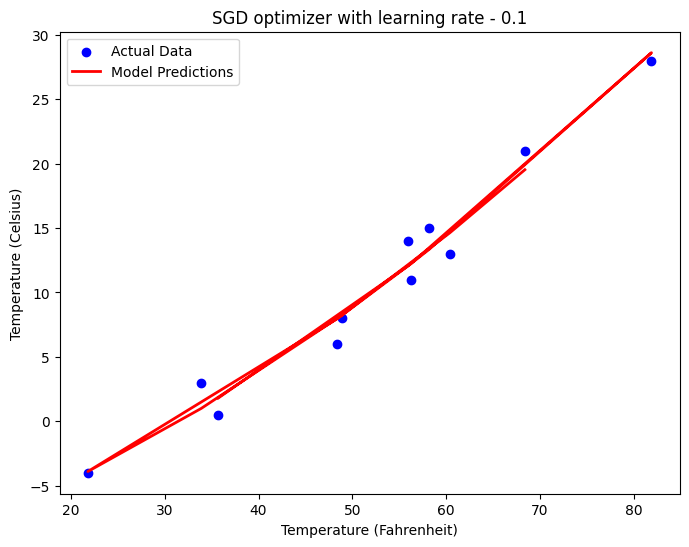


Training with SGD optimizer and learning rate 0.01


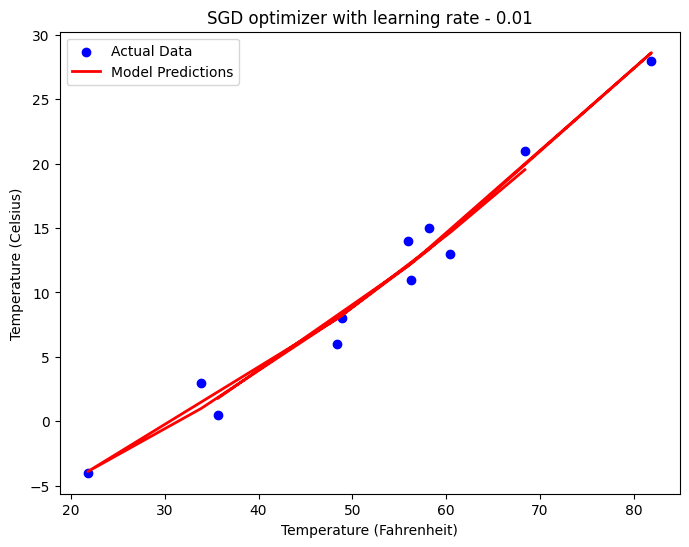


Training with SGD optimizer and learning rate 0.001


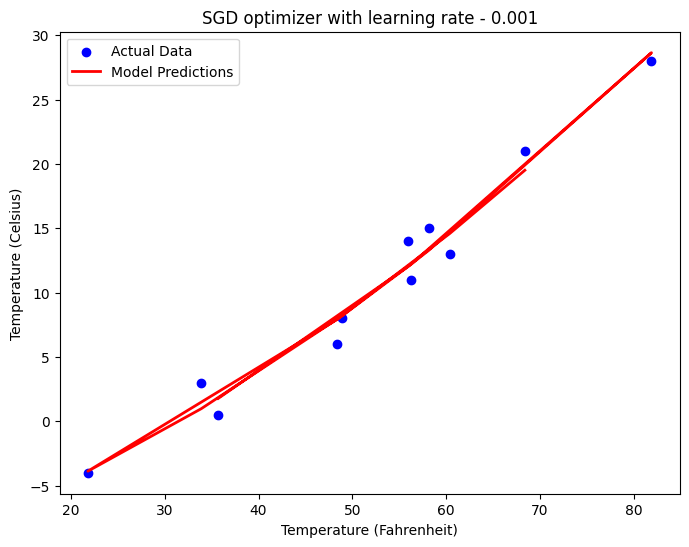


Training with SGD optimizer and learning rate 0.0001


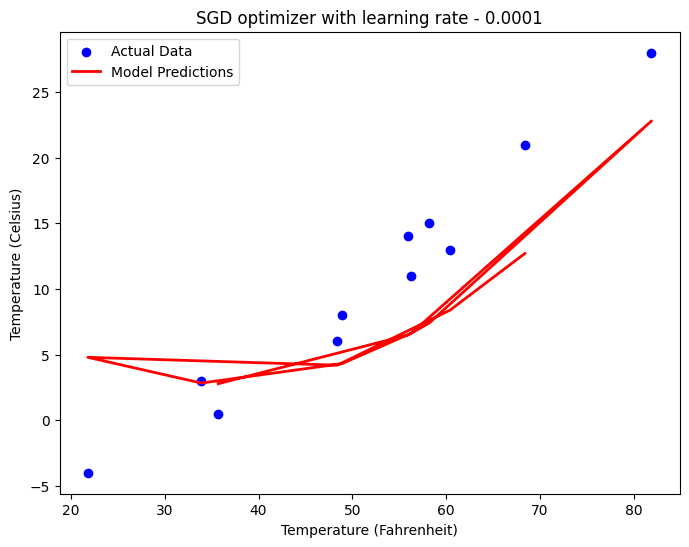


Training with Adam optimizer and learning rate 0.1


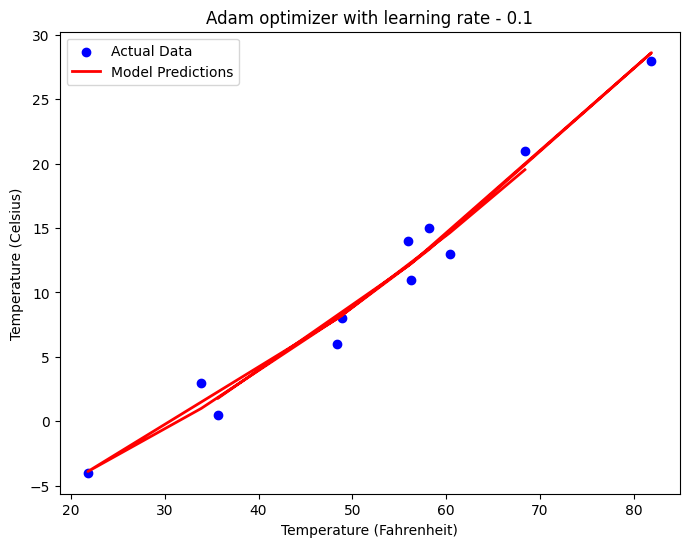


Training with Adam optimizer and learning rate 0.01


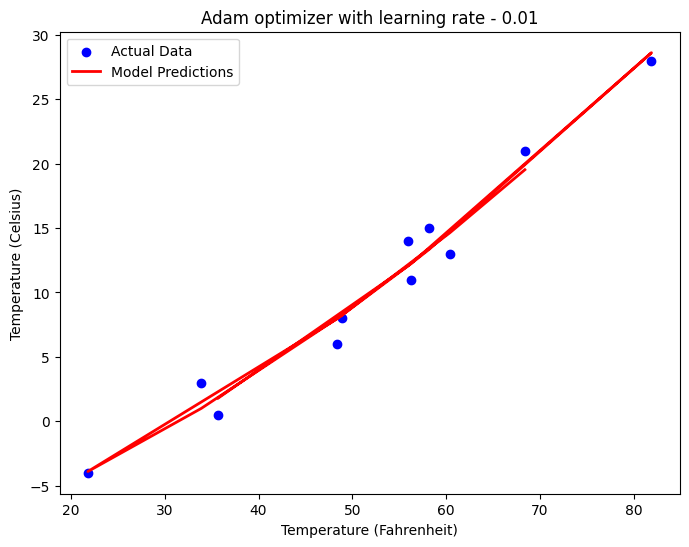


Training with Adam optimizer and learning rate 0.001


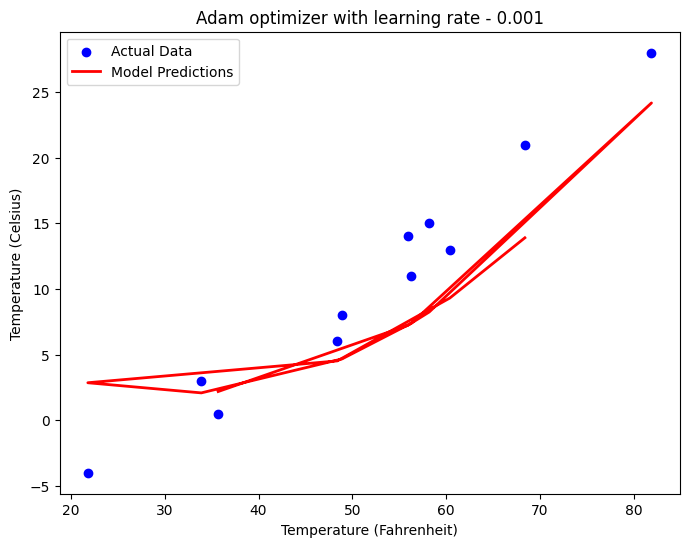


Training with Adam optimizer and learning rate 0.0001


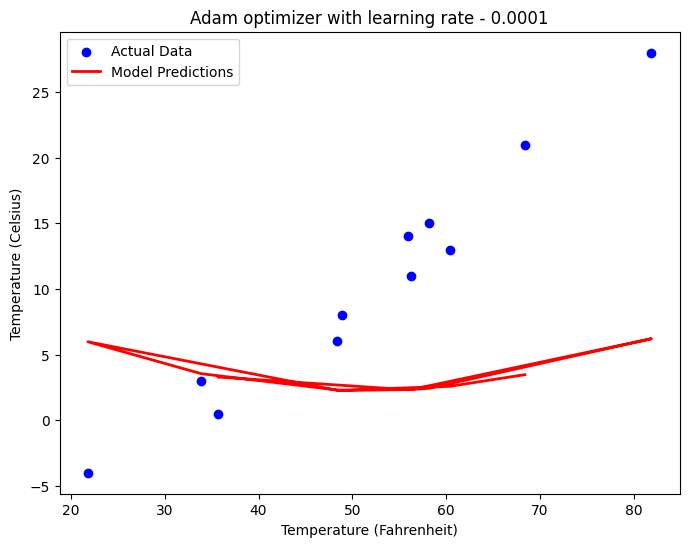

In [5]:
import torch
import torch.optim as optim
import matplotlib.pyplot as plt

# Given data
t_c = torch.tensor([0.5, 14.0, 15.0, 28.0, 11.0, 8.0, 3.0, -4.0, 6.0, 13.0, 21.0], dtype=torch.float32)
t_u = torch.tensor([35.7, 55.9, 58.2, 81.9, 56.3, 48.9, 33.9, 21.8, 48.4, 60.4, 68.4], dtype=torch.float32)

# Normalize input data
t_u_normalized = (t_u - t_u.mean()) / t_u.std()

# Define the nonlinear model
def nonlinear_model(t_u):
    return w2 * t_u ** 2 + w1 * t_u + b

# Define the loss function
def loss_fn(y_pred, y_true):
    return ((y_pred - y_true) ** 2).mean()

# Function to train the model and return predictions
def train_and_plot(optimizer_name, learning_rate, n_epochs=5000):
    global w1, w2, b
    # Initialize parameters
    w1 = torch.randn(1, requires_grad=True)
    w2 = torch.randn(1, requires_grad=True)
    b = torch.randn(1, requires_grad=True)

    # Set up optimizer
    if optimizer_name == 'SGD':
        optimizer = optim.SGD([w1, w2, b], lr=learning_rate)
    elif optimizer_name == 'Adam':
        optimizer = optim.Adam([w1, w2, b], lr=learning_rate)

    # Train the model
    for epoch in range(n_epochs):
        y_pred = nonlinear_model(t_u_normalized)
        loss = loss_fn(y_pred, t_c)

        loss.backward()
        optimizer.step()
        optimizer.zero_grad()

    # Get final predictions
    with torch.no_grad():
        final_predictions = nonlinear_model(t_u_normalized).detach()

    # Plot results
    plt.figure(figsize=(8, 6))
    plt.scatter(t_u.numpy(), t_c.numpy(), label="Actual Data", color='blue', marker='o')
    plt.plot(t_u.numpy(), final_predictions.numpy(), label="Model Predictions", color='red', linewidth=2)
    plt.xlabel("Temperature (Fahrenheit)")
    plt.ylabel("Temperature (Celsius)")
    plt.title(f"{optimizer_name} optimizer with learning rate - {learning_rate}")
    plt.legend()
    plt.show()

# Learning rates to test
learning_rates = [0.1, 0.01, 0.001, 0.0001]

# Plot results for each optimizer and learning rate
for optimizer_name in ['SGD', 'Adam']:
    for lr in learning_rates:
        print(f"\nTraining with {optimizer_name} optimizer and learning rate {lr}")
        train_and_plot(optimizer_name, lr)


In [7]:
# Dictionary to store final losses for each configuration
final_losses = {}

# Function to train and get final loss without plotting
def train_and_get_loss(optimizer_name, learning_rate, n_epochs=5000):
    global w1, w2, b
    # Initialize parameters
    w1 = torch.randn(1, requires_grad=True)
    w2 = torch.randn(1, requires_grad=True)
    b = torch.randn(1, requires_grad=True)

    # Set up optimizer
    if optimizer_name == 'SGD':
        optimizer = optim.SGD([w1, w2, b], lr=learning_rate)
    elif optimizer_name == 'Adam':
        optimizer = optim.Adam([w1, w2, b], lr=learning_rate)

    # Train the model
    for epoch in range(n_epochs):
        y_pred = nonlinear_model(t_u_normalized)
        loss = loss_fn(y_pred, t_c)

        loss.backward()
        optimizer.step()
        optimizer.zero_grad()

    # Return the final loss
    return loss.item()

# Run the training function for each configuration and store the final loss
for optimizer_name in ['SGD', 'Adam']:
    for lr in [0.1, 0.01, 0.001, 0.0001]:
        print(f"\nTraining with {optimizer_name} optimizer and learning rate {lr}")
        final_loss = train_and_get_loss(optimizer_name, lr)
        final_losses[(optimizer_name, lr)] = final_loss
        print(f"Final Loss for {optimizer_name} with learning rate {lr}: {final_loss:.4f}")

# Find the best configuration based on minimum loss
best_config = min(final_losses, key=final_losses.get)
best_loss = final_losses[best_config]

print("\nBest Configuration:")
print(f"Optimizer: {best_config[0]}, Learning Rate: {best_config[1]}, Loss: {best_loss:.4f}")



Training with SGD optimizer and learning rate 0.1
Final Loss for SGD with learning rate 0.1: 2.0907

Training with SGD optimizer and learning rate 0.01
Final Loss for SGD with learning rate 0.01: 2.0907

Training with SGD optimizer and learning rate 0.001
Final Loss for SGD with learning rate 0.001: 2.0925

Training with SGD optimizer and learning rate 0.0001
Final Loss for SGD with learning rate 0.0001: 19.3104

Training with Adam optimizer and learning rate 0.1
Final Loss for Adam with learning rate 0.1: 2.0907

Training with Adam optimizer and learning rate 0.01
Final Loss for Adam with learning rate 0.01: 2.0907

Training with Adam optimizer and learning rate 0.001
Final Loss for Adam with learning rate 0.001: 40.3825

Training with Adam optimizer and learning rate 0.0001
Final Loss for Adam with learning rate 0.0001: 116.4436

Best Configuration:
Optimizer: SGD, Learning Rate: 0.01, Loss: 2.0907


Problem 2

In [12]:
import pandas as pd
import torch
import torch.optim as optim
import torch.nn as nn
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

# Mount Google Drive (if needed)
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

# Load the dataset from Google Drive
file_path = '/content/drive/MyDrive/ML Assignment/Housing.csv'
housing_data = pd.read_csv(file_path)

# Select input and output features
input_features = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking']
output_feature = 'price'

# Normalize the features using MinMaxScaler
scaler_x = MinMaxScaler()
scaler_y = MinMaxScaler()
housing_data[input_features] = scaler_x.fit_transform(cancer_data[input_features])
housing_data[[output_feature]] = scaler_y.fit_transform(cancer_data[[output_feature]])

# Define data and target variables
X = housing_data[input_features].values
y = housing_data[[output_feature]].values


Mounted at /content/drive


In [13]:
# Define the linear model function
def linear_model(X, W, B):
    return torch.sum(X * W, dim=1) + B

# Define the Mean Squared Error loss function
def loss_fn(predicted, actual):
    return torch.mean((predicted - actual) ** 2)


In [14]:
def training_loop(n_epochs, optimizer, W, B, X_train, X_val, y_train, y_val):
    train_losses = []
    val_losses = []

    for epoch in range(1, n_epochs + 1):
        # Training prediction and loss
        y_train_pred = linear_model(X_train, W, B)
        train_loss = loss_fn(y_train_pred, y_train)

        # Validation prediction and loss
        y_val_pred = linear_model(X_val, W, B)
        val_loss = loss_fn(y_val_pred, y_val)

        # Backpropagation and parameter update
        optimizer.zero_grad()
        train_loss.backward()
        optimizer.step()

        # Record the losses every 500 epochs
        if epoch % 500 == 0:
            train_losses.append(train_loss.item())
            val_losses.append(val_loss.item())
            print(f"Epoch {epoch}, Train Loss: {train_loss.item():.4f}, Validation Loss: {val_loss.item():.4f}")

    return W, B, train_losses, val_losses


In [15]:
from sklearn.model_selection import train_test_split

# Split the dataset into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert data to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32).squeeze()
X_val_tensor = torch.tensor(X_val, dtype=torch.float32)
y_val_tensor = torch.tensor(y_val, dtype=torch.float32).squeeze()

# Initialize weights and bias
W = torch.tensor(np.ones(X_train.shape[1]), dtype=torch.float32, requires_grad=True)
B = torch.tensor(0.0, dtype=torch.float32, requires_grad=True)


In [16]:
import torch.optim as optim

learning_rates = [0.1, 0.01, 0.001, 0.0001]
n_epochs = 5000
results = {}

for optimizer_name in ['SGD', 'Adam']:
    for lr in learning_rates:
        print(f"\nTraining with {optimizer_name} optimizer, Learning Rate: {lr}")

        # Reinitialize weights and bias for each run
        W = torch.tensor(np.ones(X_train.shape[1]), dtype=torch.float32, requires_grad=True)
        B = torch.tensor(0.0, dtype=torch.float32, requires_grad=True)

        # Set up the optimizer
        if optimizer_name == 'SGD':
            optimizer = optim.SGD([W, B], lr=lr)
        elif optimizer_name == 'Adam':
            optimizer = optim.Adam([W, B], lr=lr)

        # Run the training loop
        W, B, train_losses, val_losses = training_loop(
            n_epochs=n_epochs, optimizer=optimizer, W=W, B=B,
            X_train=X_train_tensor, X_val=X_val_tensor,
            y_train=y_train_tensor, y_val=y_val_tensor
        )

        # Store results
        results[(optimizer_name, lr)] = (train_losses, val_losses)



Training with SGD optimizer, Learning Rate: 0.1
Epoch 500, Train Loss: 0.0104, Validation Loss: 0.0171
Epoch 1000, Train Loss: 0.0101, Validation Loss: 0.0171
Epoch 1500, Train Loss: 0.0101, Validation Loss: 0.0172
Epoch 2000, Train Loss: 0.0101, Validation Loss: 0.0172
Epoch 2500, Train Loss: 0.0101, Validation Loss: 0.0172
Epoch 3000, Train Loss: 0.0101, Validation Loss: 0.0172
Epoch 3500, Train Loss: 0.0101, Validation Loss: 0.0172
Epoch 4000, Train Loss: 0.0101, Validation Loss: 0.0172
Epoch 4500, Train Loss: 0.0101, Validation Loss: 0.0172
Epoch 5000, Train Loss: 0.0101, Validation Loss: 0.0172

Training with SGD optimizer, Learning Rate: 0.01
Epoch 500, Train Loss: 0.0502, Validation Loss: 0.0483
Epoch 1000, Train Loss: 0.0218, Validation Loss: 0.0236
Epoch 1500, Train Loss: 0.0148, Validation Loss: 0.0189
Epoch 2000, Train Loss: 0.0126, Validation Loss: 0.0179
Epoch 2500, Train Loss: 0.0117, Validation Loss: 0.0176
Epoch 3000, Train Loss: 0.0111, Validation Loss: 0.0174
Epoch 3

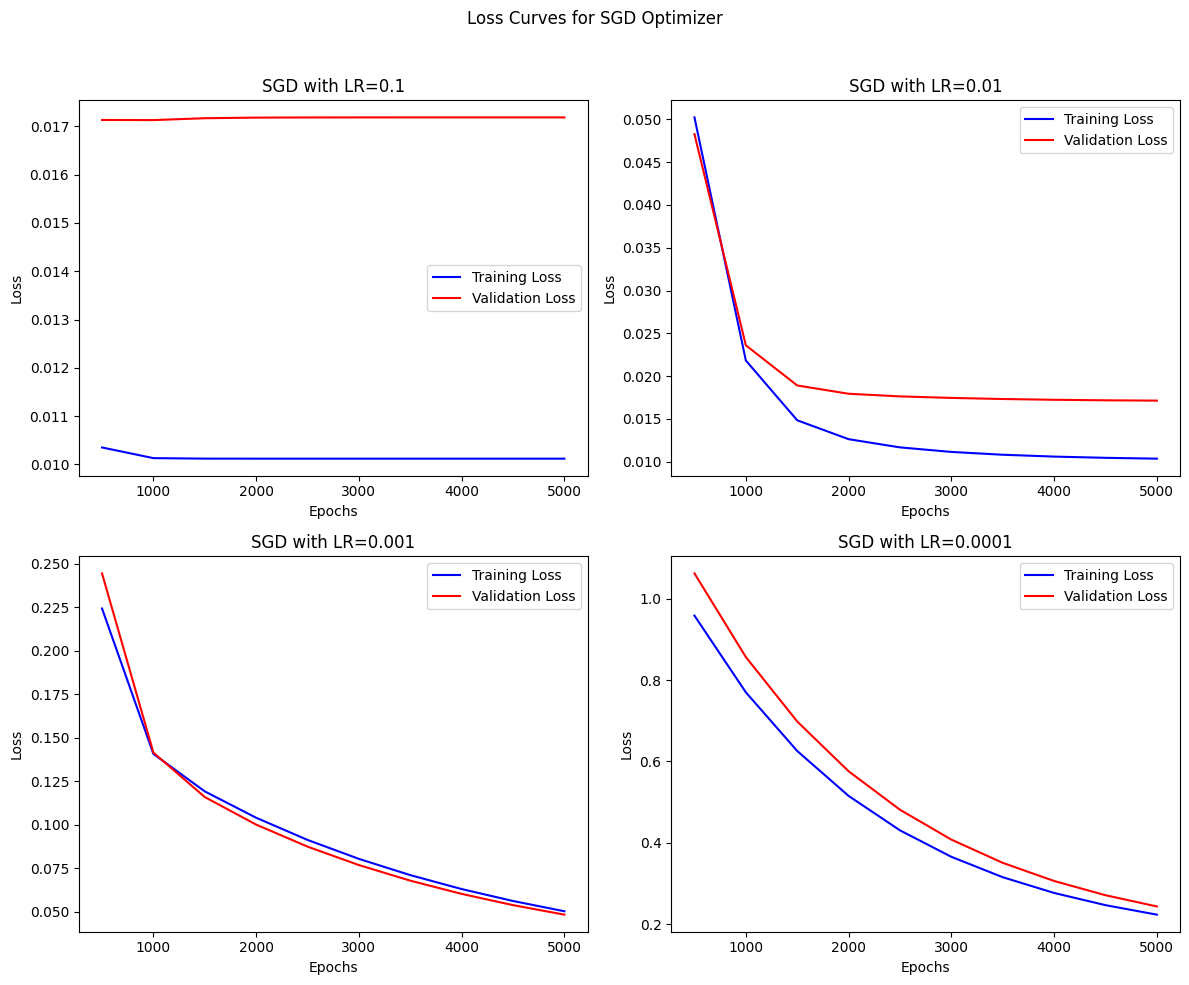

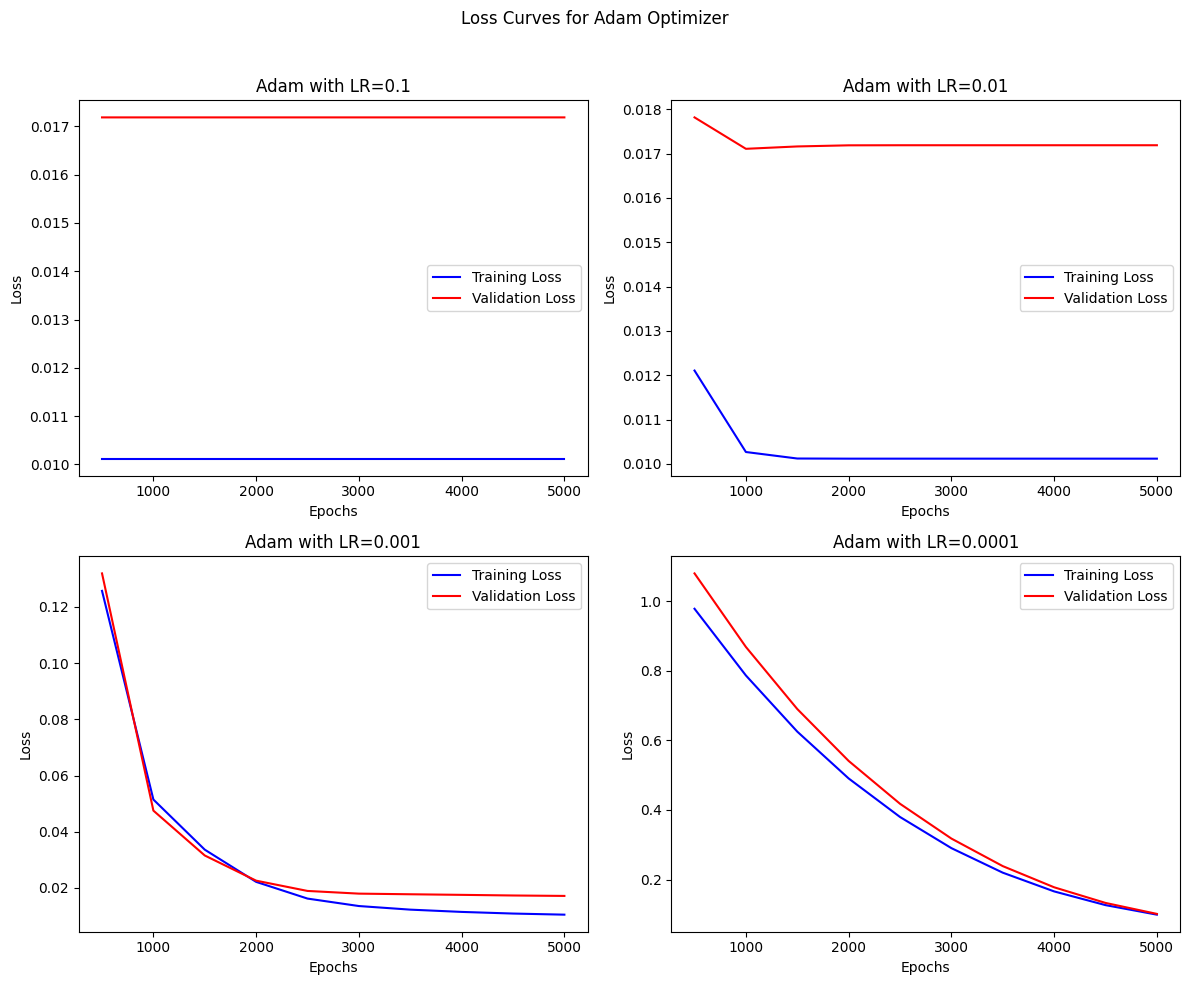

In [17]:
import matplotlib.pyplot as plt

epochs = range(500, n_epochs + 1, 500)

# Plot results for SGD optimizer
plt.figure(figsize=(12, 10))
plt.suptitle('Loss Curves for SGD Optimizer')
for i, lr in enumerate(learning_rates, 1):
    plt.subplot(2, 2, i)
    plt.plot(epochs, results[('SGD', lr)][0], label='Training Loss', color='blue')
    plt.plot(epochs, results[('SGD', lr)][1], label='Validation Loss', color='red')
    plt.title(f'SGD with LR={lr}')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

# Plot results for Adam optimizer
plt.figure(figsize=(12, 10))
plt.suptitle('Loss Curves for Adam Optimizer')
for i, lr in enumerate(learning_rates, 1):
    plt.subplot(2, 2, i)
    plt.plot(epochs, results[('Adam', lr)][0], label='Training Loss', color='blue')
    plt.plot(epochs, results[('Adam', lr)][1], label='Validation Loss', color='red')
    plt.title(f'Adam with LR={lr}')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


Problem 3


In [21]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Mount Google Drive (if needed)
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

# Load the dataset from Google Drive
file_path = '/content/drive/MyDrive/ML Assignment/Housing.csv'
housing_data = pd.read_csv(file_path)

# Define all input features, dropping non-numeric columns
numeric_features = housing_data.select_dtypes(include=[float, int]).columns.drop('price')
output_feature = 'price'

# Normalize the numeric features using MinMaxScaler
scaler_x = MinMaxScaler()
scaler_y = MinMaxScaler()
housing_data[numeric_features] = scaler_x.fit_transform(housing_data[numeric_features])
housing_data[[output_feature]] = scaler_y.fit_transform(housing_data[[output_feature]])

# Define data and target variables
X = housing_data[numeric_features].values
y = housing_data[[output_feature]].values


Mounted at /content/drive


In [22]:
import torch

# Define the linear model function
def linear_model(X, W, B):
    return torch.sum(X * W, dim=1) + B

# Define the Mean Squared Error loss function
def loss_fn(predicted, actual):
    return torch.mean((predicted - actual) ** 2)


In [23]:
def training_loop(n_epochs, optimizer, W, B, X_train, X_val, y_train, y_val):
    train_losses = []
    val_losses = []

    for epoch in range(1, n_epochs + 1):
        # Training prediction and loss
        y_train_pred = linear_model(X_train, W, B)
        train_loss = loss_fn(y_train_pred, y_train)

        # Validation prediction and loss
        y_val_pred = linear_model(X_val, W, B)
        val_loss = loss_fn(y_val_pred, y_val)

        # Backpropagation and parameter update
        optimizer.zero_grad()
        train_loss.backward()
        optimizer.step()

        # Record the losses every 500 epochs
        if epoch % 500 == 0:
            train_losses.append(train_loss.item())
            val_losses.append(val_loss.item())
            print(f"Epoch {epoch}, Train Loss: {train_loss.item():.4f}, Validation Loss: {val_loss.item():.4f}")

    return W, B, train_losses, val_losses


In [24]:
from sklearn.model_selection import train_test_split
import numpy as np

# Split the dataset into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert data to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32).squeeze()
X_val_tensor = torch.tensor(X_val, dtype=torch.float32)
y_val_tensor = torch.tensor(y_val, dtype=torch.float32).squeeze()

# Initialize weights and bias
W = torch.tensor(np.ones(X_train.shape[1]), dtype=torch.float32, requires_grad=True)
B = torch.tensor(0.0, dtype=torch.float32, requires_grad=True)


In [25]:
import torch.optim as optim

learning_rates = [0.1, 0.01, 0.001, 0.0001]
n_epochs = 5000
results = {}

for optimizer_name in ['SGD', 'Adam']:
    for lr in learning_rates:
        print(f"\nTraining with {optimizer_name} optimizer, Learning Rate: {lr}")

        # Reinitialize weights and bias for each run
        W = torch.tensor(np.ones(X_train.shape[1]), dtype=torch.float32, requires_grad=True)
        B = torch.tensor(0.0, dtype=torch.float32, requires_grad=True)

        # Set up the optimizer
        if optimizer_name == 'SGD':
            optimizer = optim.SGD([W, B], lr=lr)
        elif optimizer_name == 'Adam':
            optimizer = optim.Adam([W, B], lr=lr)

        # Run the training loop
        W, B, train_losses, val_losses = training_loop(
            n_epochs=n_epochs, optimizer=optimizer, W=W, B=B,
            X_train=X_train_tensor, X_val=X_val_tensor,
            y_train=y_train_tensor, y_val=y_val_tensor
        )

        # Store results
        results[(optimizer_name, lr)] = (train_losses, val_losses)



Training with SGD optimizer, Learning Rate: 0.1
Epoch 500, Train Loss: 0.0104, Validation Loss: 0.0171
Epoch 1000, Train Loss: 0.0101, Validation Loss: 0.0171
Epoch 1500, Train Loss: 0.0101, Validation Loss: 0.0172
Epoch 2000, Train Loss: 0.0101, Validation Loss: 0.0172
Epoch 2500, Train Loss: 0.0101, Validation Loss: 0.0172
Epoch 3000, Train Loss: 0.0101, Validation Loss: 0.0172
Epoch 3500, Train Loss: 0.0101, Validation Loss: 0.0172
Epoch 4000, Train Loss: 0.0101, Validation Loss: 0.0172
Epoch 4500, Train Loss: 0.0101, Validation Loss: 0.0172
Epoch 5000, Train Loss: 0.0101, Validation Loss: 0.0172

Training with SGD optimizer, Learning Rate: 0.01
Epoch 500, Train Loss: 0.0502, Validation Loss: 0.0483
Epoch 1000, Train Loss: 0.0218, Validation Loss: 0.0236
Epoch 1500, Train Loss: 0.0148, Validation Loss: 0.0189
Epoch 2000, Train Loss: 0.0126, Validation Loss: 0.0179
Epoch 2500, Train Loss: 0.0117, Validation Loss: 0.0176
Epoch 3000, Train Loss: 0.0111, Validation Loss: 0.0174
Epoch 3

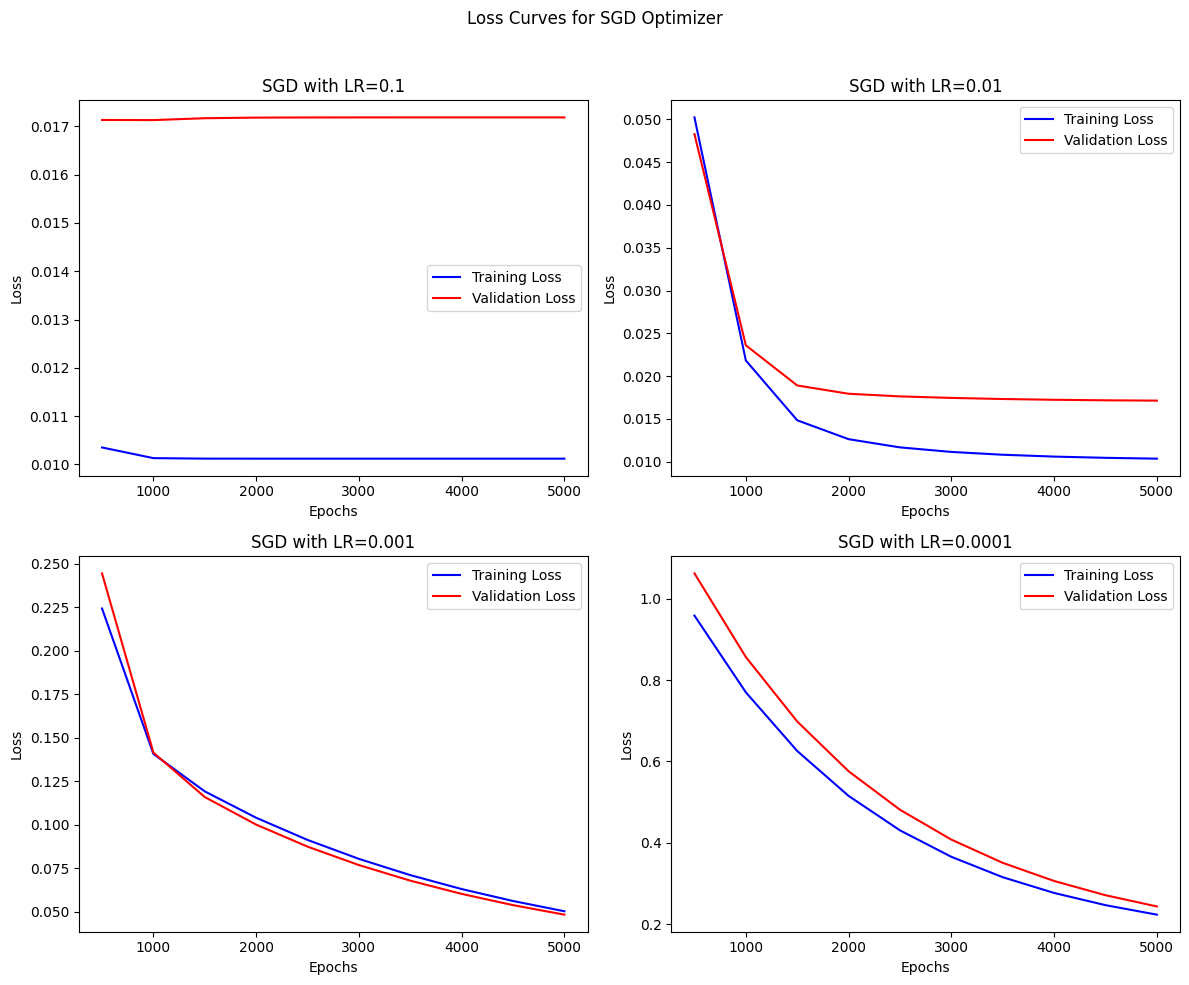

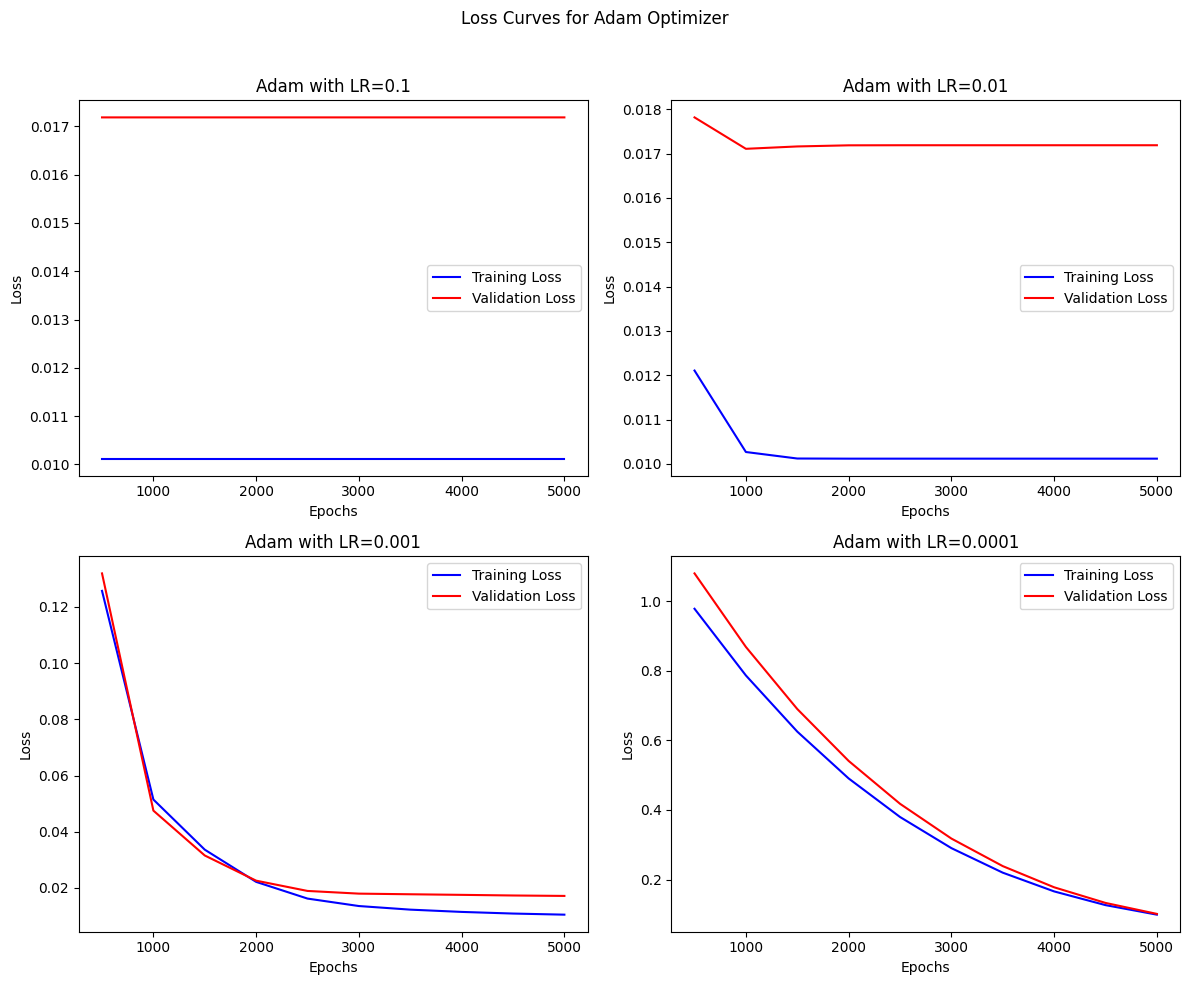

In [26]:
import matplotlib.pyplot as plt

epochs = range(500, n_epochs + 1, 500)

# Plot results for SGD optimizer
plt.figure(figsize=(12, 10))
plt.suptitle('Loss Curves for SGD Optimizer')
for i, lr in enumerate(learning_rates, 1):
    plt.subplot(2, 2, i)
    plt.plot(epochs, results[('SGD', lr)][0], label='Training Loss', color='blue')
    plt.plot(epochs, results[('SGD', lr)][1], label='Validation Loss', color='red')
    plt.title(f'SGD with LR={lr}')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

# Plot results for Adam optimizer
plt.figure(figsize=(12, 10))
plt.suptitle('Loss Curves for Adam Optimizer')
for i, lr in enumerate(learning_rates, 1):
    plt.subplot(2, 2, i)
    plt.plot(epochs, results[('Adam', lr)][0], label='Training Loss', color='blue')
    plt.plot(epochs, results[('Adam', lr)][1], label='Validation Loss', color='red')
    plt.title(f'Adam with LR={lr}')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()
